# Notebook to analyze features
- To analyze features for certain utterances from some spesific persons. Can be used to analyse a spesific person from t.d a fold or experiment we want more information about.  
- Advantageus to investigate the waveforms, and images from the feature extraction process. 

### Imports 

In [1]:
%run project_setup.py 


import os
from IPython.display import Audio

from disvoice.articulation.articulation import Articulation
from disvoice.phonation.phonation import Phonation
from disvoice.prosody.prosody import Prosody


from constants import *
from GITA_wav_paths import * # DDK, words, sentences and monologue and vowels:
from functions import extend_paths, find_certain_paths_from_all_paths

2024-06-27 15:04:46.476550: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-27 15:04:46.476647: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-27 15:04:46.557240: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-27 15:04:46.807339: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 15:04:50.072073: W tensorflow/compiler/tf2

### Get data from PC-GITA
According to the utterances and features we want 

In [2]:
def find_waveforms(paths):
    waveforms = []
    for one_path in paths:
        for dirpath, _, filenames in os.walk(one_path):  # Iterate through the directory
            for filename in filenames:
                filepath = os.path.join(dirpath, filename)
                waveforms.append(filepath)
    return waveforms

In [3]:
# Choosing data to extract: 
paths = hc_paths_vowels # Ex: hc_paths_vowels, pd_paths_vowels

data_types = ["/A"] # Example: ["/A", "viaje"]

id_nr = ["0001"] # only "" if you want all of them

paths = extend_paths(paths, path_PC_GITA_16k)
paths = find_certain_paths_from_all_paths(paths, data_types)
files = find_waveforms(paths)
files = find_certain_paths_from_all_paths(files, id_nr)

# If you just want to work with one element: 
files=[files[1]]
print("You now have ", len(files), " files:")
print(files)


You now have  1  files:
['/home/malinre/master-thesis/PC-GITA-v2-mod/PC-GITA_per_task_16000Hz/Vowels/Control/A/AVPEPUDEAC0001_a1.wav']


### Listening to the audios: 

In [11]:
for elem in files: 
    print(elem)
    display(Audio(elem,autoplay=False)) 

/home/malinre/master-thesis/PC-GITA-v2-mod/PC-GITA_per_task_16000Hz/Vowels/Control/A/AVPEPUDEAC0001_a1.wav


### Extract phonation features

In [1]:
# To remove "findfont: Font family 'Times New Roman' not found" error: (Changes default to one that actually is installed in /miniconda3/envs/disenv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf)
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DeJavu Serif'

# Ignore userwarning about color being not needed to be defined. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

/home/malinre/master-thesis/PC-GITA-v2-mod/PC-GITA_per_task_16000Hz/Vowels/Control/A/AVPEPUDEAC0001_a1.wav


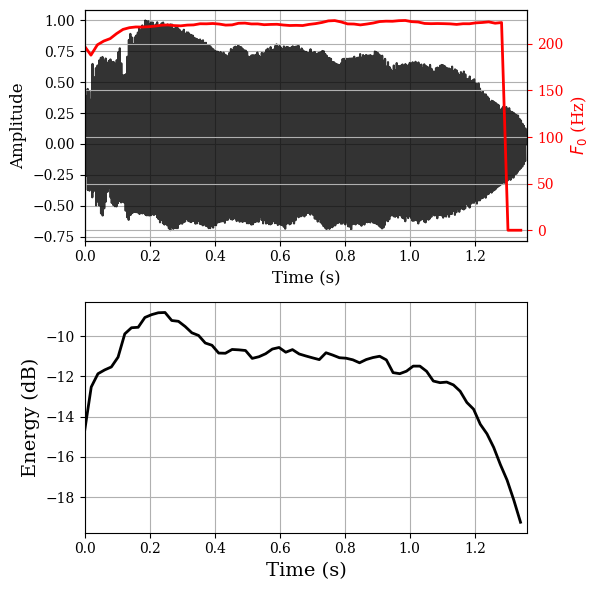

Phonation features: 


,avg DF0,avg DDF0,avg Jitter,avg Shimmer,avg apq,avg ppq,avg logE,std DF0,std DDF0,std Jitter,...,skewness apq,skewness ppq,skewness logE,kurtosis DF0,kurtosis DDF0,kurtosis Jitter,kurtosis Shimmer,kurtosis apq,kurtosis ppq,kurtosis logE
0,0.389625,0.161177,0.523707,2.221219,3.013897,0.231899,-11.600875,2.223977,2.933505,0.846824,...,0.768198,1.749925,-1.691693,12.229071,34.979595,14.381385,0.203459,-0.434058,3.685854,3.100088


In [13]:
phonationf = Phonation()
print(phonationf)

for elem in files:
    print(elem)
    features_phonation=phonationf.extract_features_file(elem, static=True, plots=True, fmt="csv") 

    print("Phonation features: ")
    display(features_phonation)

### Extract articulation features

/home/malinre/master-thesis/PC-GITA-v2-mod/PC-GITA_per_task_16000Hz/Vowels/Control/A/AVPEPUDEAC0001_a1.wav


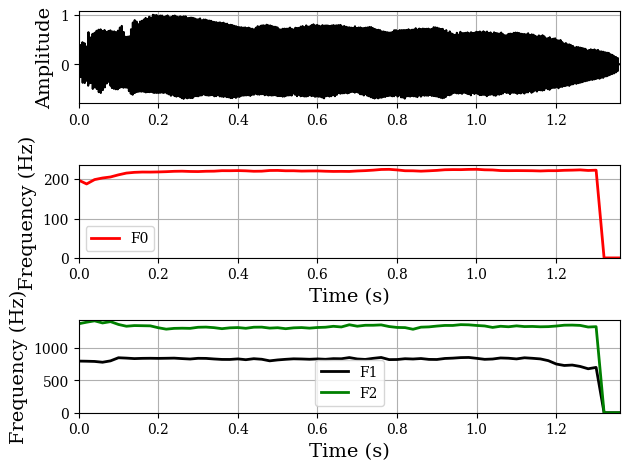

Articulation features: 


,avg BBEon_1,avg BBEon_2,avg BBEon_3,avg BBEon_4,avg BBEon_5,avg BBEon_6,avg BBEon_7,avg BBEon_8,avg BBEon_9,avg BBEon_10,...,kurtosis DDMFCCoff_9,kurtosis DDMFCCoff_10,kurtosis DDMFCCoff_11,kurtosis DDMFCCoff_12,kurtosis F1,kurtosis DF1,kurtosis DDF1,kurtosis F2,kurtosis DF2,kurtosis DDF2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.898384,58.936058,28.78483,1.504775,61.787105,29.780079


In [14]:
articulationf=Articulation()

for elem in files:
    print(elem) 
    ## Extract static features and return them as a df 
    features_articulation=articulationf.extract_features_file(elem, static=True, plots=True, fmt="csv")

    print("Articulation features: ")
    display(features_articulation) 
    # display(features_articulation)



### Extract prosody features

/home/malinre/master-thesis/PC-GITA-v2-mod/PC-GITA_per_task_16000Hz/Vowels/Control/A/AVPEPUDEAC0001_a1.wav


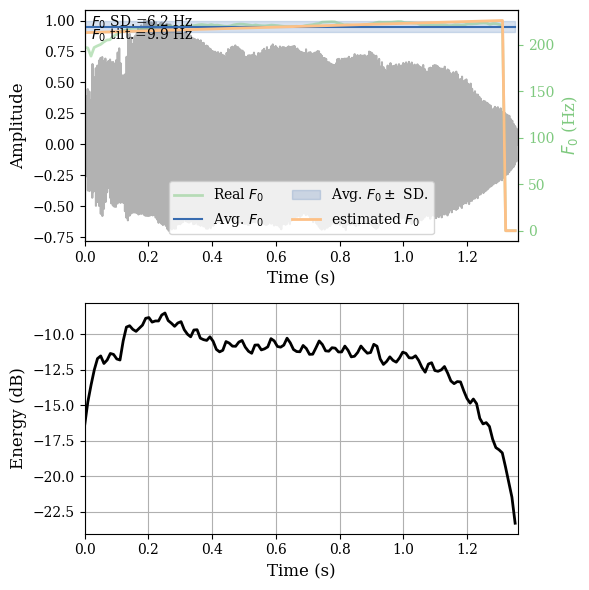

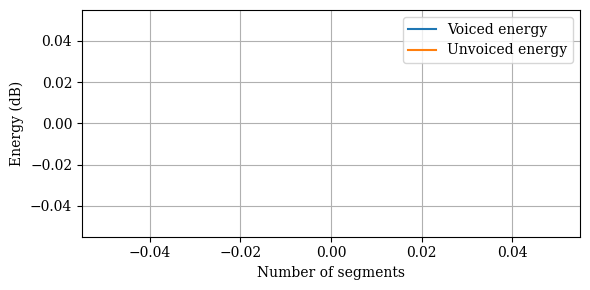

Prosodu features: 


,F0avg,F0std,F0max,F0min,F0skew,F0kurt,F0tiltavg,F0mseavg,F0tiltstd,F0msestd,...,skwdurpause,kurtosisdurpause,maxdurpause,mindurpause,PVU,PU,UVU,VVU,VP,UP
0,219.661301,6.158555,225.145508,187.860657,-2.979931,9.105162,9.912226,23.44542,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
prosodyf=Prosody()
for elem in files:
    print(elem)
    features_prosody=prosodyf.extract_features_file(elem, static=True, plots=True, fmt="csv")

    print("Prosodu features: ")
    display(features_prosody)

